/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


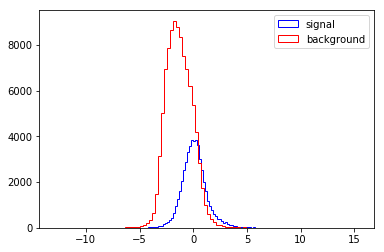

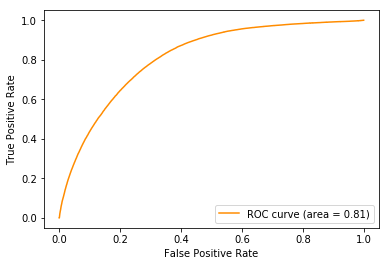

In [2]:
#importing libraries I will need for this problem
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv

#changing the 's' and 'b' in the csv file to 1.0 and 0.0
ifile  = open('mytraining.csv', "rb")
reader = csv.reader(ifile)
ofile  = open('mytraining1.csv', "wb")
writer = csv.writer(ofile, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
 
for row in reader:
    if row[32] == 's': 
        row[32] = 1.0
    if row[32] == 'b':
        row[32] = 0.0
    writer.writerow(row)
ifile.close()
ofile.close()
    
#importing the training data
filename = "/home/jselvarathinam/Exam-1/mytraining1.csv"

var_names = ["EventId","DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h","DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet","DER_deltar_tau_lep","DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau","DER_met_phi_centrality","DER_lep_eta_centrality","PRI_tau_pt","PRI_tau_eta","PRI_tau_phi","PRI_lep_pt","PRI_lep_eta","PRI_lep_phi","PRI_met","PRI_met_phi","PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt","Weight","Label"]      

df = pd.read_csv(filename, dtype='float64', names = var_names)

df_sig=df[df.Label == 1.0]
df_bkg=df[df.Label == 0.0]

#training the classifier
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

N_Train= 100000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[var_names[:31]]
y_Train=Train_Sample["Label"]

X_Test=Test_Sample[var_names[:31]]
y_Test=Test_Sample["Label"]

Test_sig=Test_Sample[Test_Sample.Label==1]
Test_bkg=Test_Sample[Test_Sample.Label==0]

Fisher.fit(X_Train,y_Train)

#plot the classifier performance
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[var_names[:31]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[var_names[:31]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()


In [ ]:
#plot roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

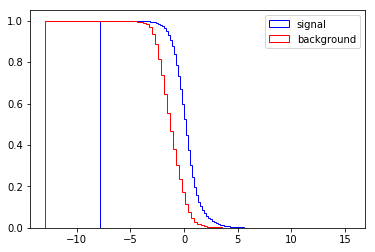

100


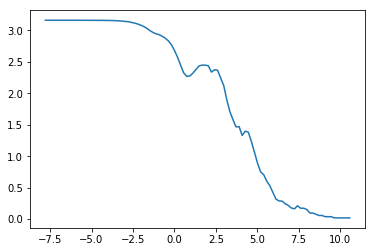

Max significance at  -7.78109652608  of 3.1622618489


(-7.781096526078688, 3.1622618488986629, 0)

In [3]:

import numpy as np

def PlotSignificance(N_S,N_B, N_S_min=1):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(Fisher.decision_function(Test_sig[var_names[:31]]),bins=100,histtype="step", color="blue", label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(Fisher.decision_function(Test_bkg[var_names[:31]]),bins=100,histtype="step", color="red", label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)

    print len(good_bins[0])
    if len(good_bins[0])<1:
        print "Insufficient Signal."
        return 0,0,0
    
    significance=(N_S*eff_sig)/np.sqrt((N_B*eff_bkg)+(N_S*eff_sig))

    plt.figure()
    plt.plot(bins_sig[:-1],significance)
    
    max_sign=np.max(significance[good_bins])
    max_signI=np.argmax(significance[good_bins])
    
    plt.show()
    print "Max significance at ", bins_sig[max_signI], " of", max_sign
    return bins_sig[max_signI],max_sign, max_signI
    
PlotSignificance(1000000,1e11)